## Analyses from (Exploration 4), for TurboTax and Overall

### Goals of this exploration
* Based on user specified criteria of brands and/or product names, filter the rows and display stats of the filtered rows

In [197]:
# This is to prepare environment and import libraries
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import PunktSentenceTokenizer
import random
import pickle
from wordcloud import WordCloud, STOPWORDS
from matplotlib.dates import date2num

In [198]:
# Load saved tagged reviews, prepared in "Exploration 3"
tagged_review_file = open('taggedDigitSoftwareReviews', "rb")
tagged_reviews = pickle.load(tagged_review_file)
tagged_review_file.close()

In [199]:
# Cast customer id as categorical or string
tagged_reviews['customer_id']=tagged_reviews['customer_id'].astype('category')
tagged_reviews['review_date']=tagged_reviews['review_date'].astype('str')

In [200]:
# Convert review date to date type
# tagged_reviews['review_date'] = pd.to_datetime(tagged_reviews['review_date'])

In [201]:
tagged_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101836 entries, 0 to 101835
Data columns (total 12 columns):
customer_id         101836 non-null category
review_id           101836 non-null object
product_id          101836 non-null object
product_title       101836 non-null object
product_category    101836 non-null object
star_rating         101836 non-null int64
review_headline     101836 non-null object
review_body         101836 non-null object
review_date         101836 non-null object
sentiment           101836 non-null object
tags                101836 non-null object
length              101836 non-null int64
dtypes: category(1), int64(2), object(9)
memory usage: 12.2+ MB


In [279]:
#tagged_reviews.review_date
#df.sort_values(by='Date')
date_sorted_tagged_reviews=tagged_reviews.sort_values(by='review_date')
date_sorted_target_reviews=target.sort_values(by='review_date')

In [203]:
tagged_reviews.describe()

,star_rating,length
count,101836.000000,101836.000000
mean,3.539662,374.155269
std,1.640100,642.046689
min,1.000000,1.000000
25%,2.000000,107.000000
50%,4.000000,191.000000
75%,5.000000,427.000000
max,5.000000,34703.000000


In [204]:
categorical=tagged_reviews.dtypes[tagged_reviews.dtypes=="object"].index
tagged_reviews[categorical].describe()

,review_id,product_id,product_title,product_category,review_headline,review_body,review_date,sentiment,tags
count,101836,101836,101836,101836,101836,101836,101836,101836,101836
unique,101836,2995,2639,1,69680,98421,2199,3,150
top,RF3L049T1CF65,B00H9A60O4,Avast Free Antivirus 2015 [Download],Digital_Software,Five Stars,Great,2015-03-04,Positive,turbotax
freq,1,9462,9462,101836,8904,131,445,62957,17736


In [205]:
tagged_reviews['customer_id'].describe()

count       101836
unique       94099
top       17957446
freq            19
Name: customer_id, dtype: int64

In [206]:
tagged_reviews[['product_title','tags','review_date']].describe()

,product_title,tags,review_date
count,101836,101836,101836
unique,2639,150,2199
top,Avast Free Antivirus 2015 [Download],turbotax,2015-03-04
freq,9462,17736,445


In [207]:
user_key_words = "Turbotax"
#user_key_words = "microsoft"
user_key_words = user_key_words.lower()

In [208]:
#tagged_reviews[['product_title','tags']]
#tagged_reviews[tagged_reviews.review_headline == "Five Stars"]
target = tagged_reviews[tagged_reviews.tags.str.match(user_key_words)]
all_negative_reviews = tagged_reviews[tagged_reviews.sentiment == 'Negative']
all_positive_reviews = tagged_reviews[tagged_reviews.sentiment == 'Positive']
target_negative_reviews = target[target.sentiment == 'Negative']
target_positive_reviews = target[target.sentiment == 'Positive']

In [209]:
target.star_rating.describe()

count    17736.000000
mean         3.465099
std          1.660031
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: star_rating, dtype: float64

In [210]:
target.describe()

,star_rating,length
count,17736.000000,17736.000000
mean,3.465099,333.825214
std,1.660031,447.579117
min,1.000000,1.000000
25%,2.000000,106.000000
50%,4.000000,195.000000
75%,5.000000,407.000000
max,5.000000,14716.000000


In [211]:
target[target.length > 10000 ]  
# Business Insight: 3 TurboTax reviewers from 2 reviewers wrote over 10k words ... probably very negative

,customer_id,review_id,product_id,product_title,product_category,star_rating,review_headline,review_body,review_date,sentiment,tags,length
34516,48845901,R1IS9PO06XNWT2,B00NG7JVSQ,TurboTax Deluxe Fed + Efile + State,Digital_Software,1,It's Really a Shame + HR Block Software Experi...,Successful businesses always under-promise and...,2015-01-05,Negative,turbotax,14716
101657,31629547,R3QGW01BFKA74K,B001M4JFS6,TurboTax Deluxe Federal + eFile 2008,Digital_Software,1,Read this Review by a Tax Attorney!,[4/12/09 UPDATE: Adding my review of the TT D...,2009-04-13,Negative,turbotax,10451
101736,31629547,R1NFDGZJP5PWFT,B001M4JFOA,TurboTax Deluxe Federal + State + eFile 2008,Digital_Software,1,Read this Review by a Tax Attorney!,[3/12/09 UPDATE: FOR ANYONE WHO DEDUCTS MORTGA...,2009-02-18,Negative,turbotax,10267


In [212]:
target['customer_id'].describe()

count        17736
unique       16707
top       27295765
freq             6
Name: customer_id, dtype: int64

In [213]:
#target['customer_id'].hist(bins=10000,figsize=(15,10))

In [214]:
#tagged_reviews['customer_id'].value_counts().plot(kind='bar')  ## This takes too long to run and plot not really readable

886079
872543


(-0.5, 399.5, 199.5, -0.5)

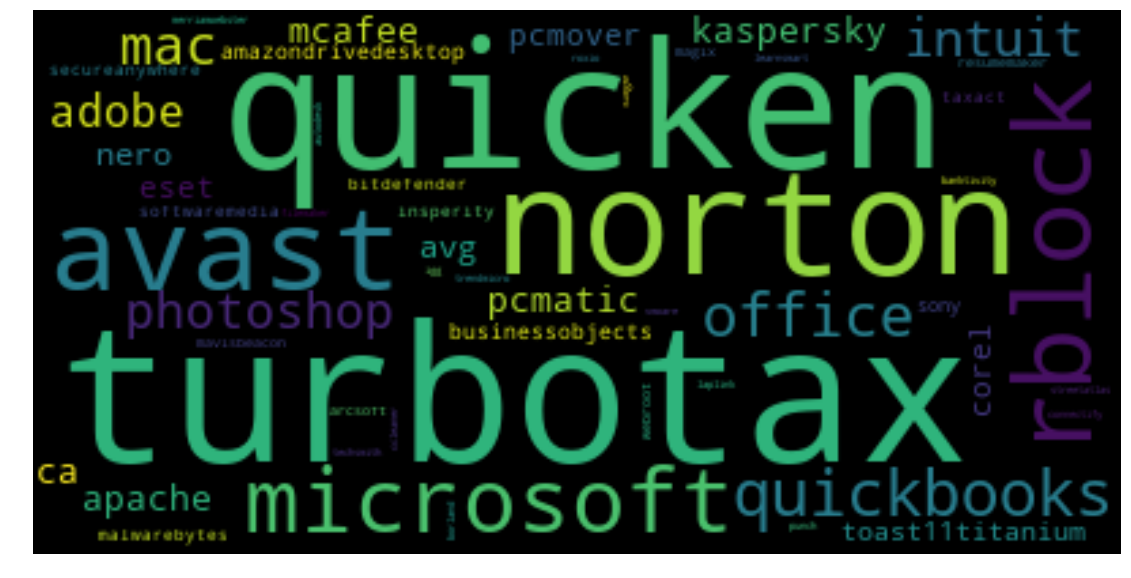

In [215]:
# General across products
# Frequencies of different tags
#
strstr='|'.join(list(tagged_reviews['tags']))
print(len(strstr))
strstr=strstr.replace(' ','')
print(len(strstr))
wc = WordCloud(collocations=False).generate(strstr)  # Unset collocations to avoid repeating words
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

268021
264063


(-0.5, 399.5, 199.5, -0.5)

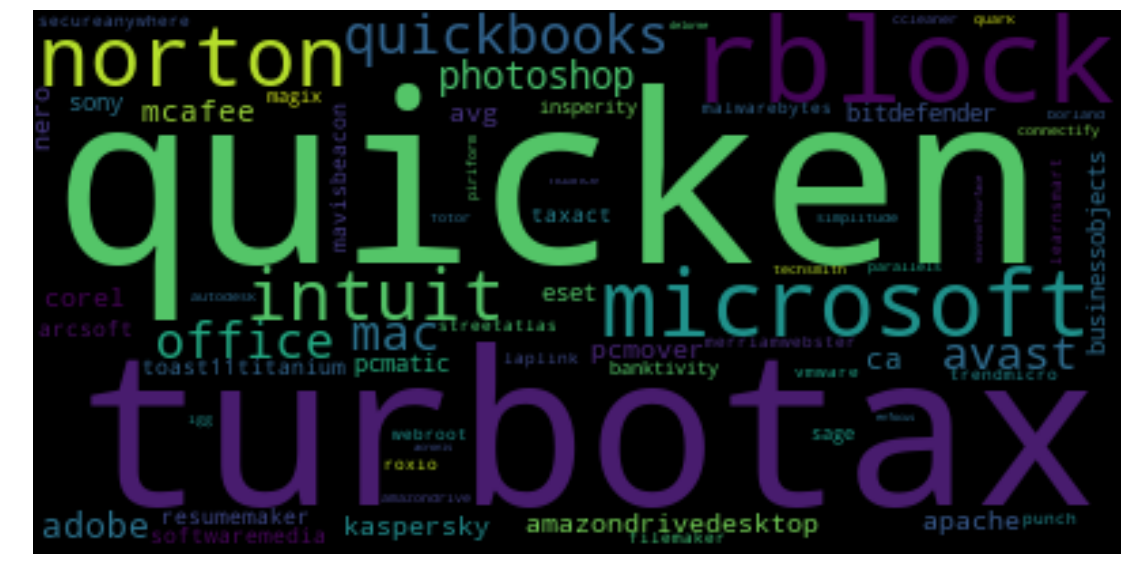

In [216]:
# General across products
# Frequencies of different tags from reviews with negative sentiment
#
strstr='|'.join(list(all_negative_reviews['tags']))
print(len(strstr))
strstr=strstr.replace(' ','')
print(len(strstr))
wc = WordCloud(collocations=False).generate(strstr)  # Unset collocations to avoid repeating words
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

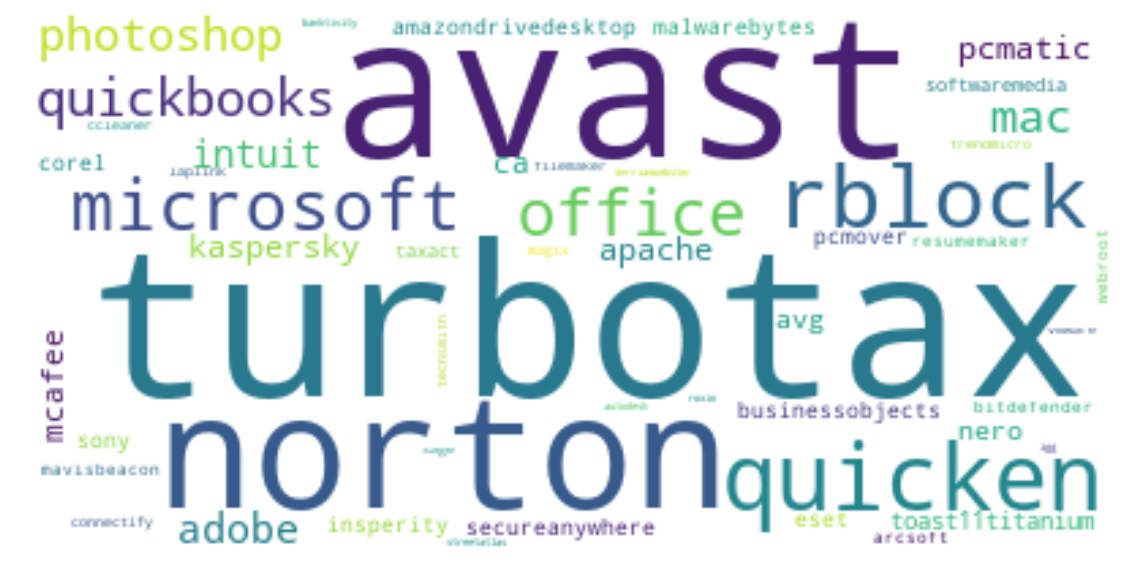

In [217]:
# General across products
# Frequencies of different tags from reviews with positive sentiment
#
strstr='|'.join(list(all_positive_reviews['tags']))
strstr=strstr.replace(' ','')
wc = WordCloud(background_color='white', collocations=False).generate(strstr)  # Unset collocations to avoid repeating words
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [218]:

review_frequency_customer = nltk.FreqDist(list(tagged_reviews['customer_id']))
negative_review_frequency_customer = nltk.FreqDist(list(all_negative_reviews['customer_id']))
positive_review_frequency_customer = nltk.FreqDist(list(all_positive_reviews['customer_id']))
target_review_frequency_customer = nltk.FreqDist(list(target['customer_id']))
target_negative_review_frequency_customer = nltk.FreqDist(list(target_negative_reviews['customer_id']))
target_positive_review_frequency_customer = nltk.FreqDist(list(target_positive_reviews['customer_id']))
#all_words_dist = nltk.FreqDist(all_words)
#print(all_words_dist.most_common(15))

# Frequency of reviewers, across products, regardless of sentiment
print("Top 10 most frequent reviewers: ", review_frequency_customer.most_common(10))
print("")
print("Top 10 most frequent reviewers(negative): ", negative_review_frequency_customer.most_common(10))
print("")
print("Top 10 most frequent reviewers(positive): ", positive_review_frequency_customer.most_common(10))
print("")
# Frequency of reviewers for TurboTax, regardless of sentiment
print("Top 10 most frequent reviewers for TurboTax: ", target_review_frequency_customer.most_common(10))
print("")
print("Top 10 most frequent reviewers(negative) for TurboTax: ", target_negative_review_frequency_customer.most_common(10))
print("")
print("Top 10 most frequent reviewers(positive) for TurboTax: ", target_positive_review_frequency_customer.most_common(10))
print("")


Top 10 most frequent reviewers:  [(17957446, 19), (1732109, 18), (20073833, 13), (43861020, 13), (12948610, 13), (6881693, 12), (51346302, 12), (47915865, 12), (50861391, 12), (18293140, 12)]

Top 10 most frequent reviewers(negative):  [(50861391, 12), (1732109, 11), (25973702, 9), (6881693, 8), (27141957, 8), (14801210, 7), (30071044, 7), (38080861, 6), (34505252, 6), (27295765, 6)]

Top 10 most frequent reviewers(positive):  [(20073833, 13), (43861020, 13), (51346302, 12), (18293140, 12), (15934721, 10), (17957446, 10), (8193959, 9), (10765316, 8), (683371, 8), (4801251, 8)]

Top 10 most frequent reviewers for TurboTax:  [(34505252, 6), (27295765, 6), (41015389, 6), (40964127, 5), (11309099, 5), (14679695, 4), (43248106, 4), (36652672, 4), (37268188, 4), (48816503, 4)]

Top 10 most frequent reviewers(negative) for TurboTax:  [(34505252, 6), (27295765, 6), (13085978, 4), (52601489, 4), (23782078, 3), (39769240, 3), (31629547, 3), (29784109, 3), (53054532, 3), (24905886, 3)]

Top 10 mo

(-0.5, 399.5, 199.5, -0.5)

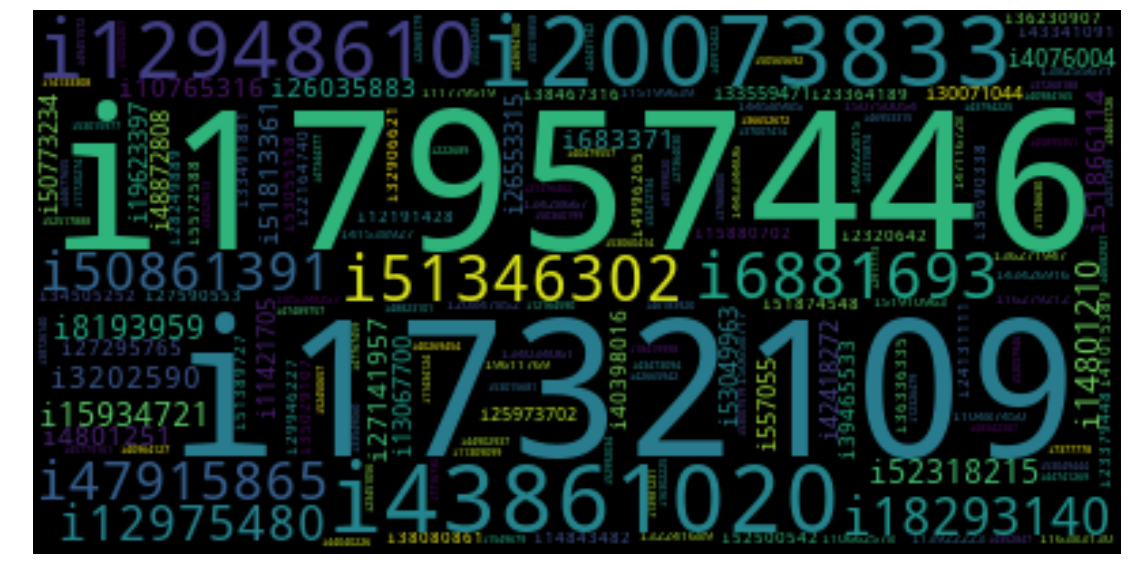

In [219]:
# Most vocal customers in the top Digital Software category
slist = [ 'i' + str(id) for id in list(tagged_reviews['customer_id']) ]
strstr=' '.join(slist)
wc = WordCloud().generate(strstr)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

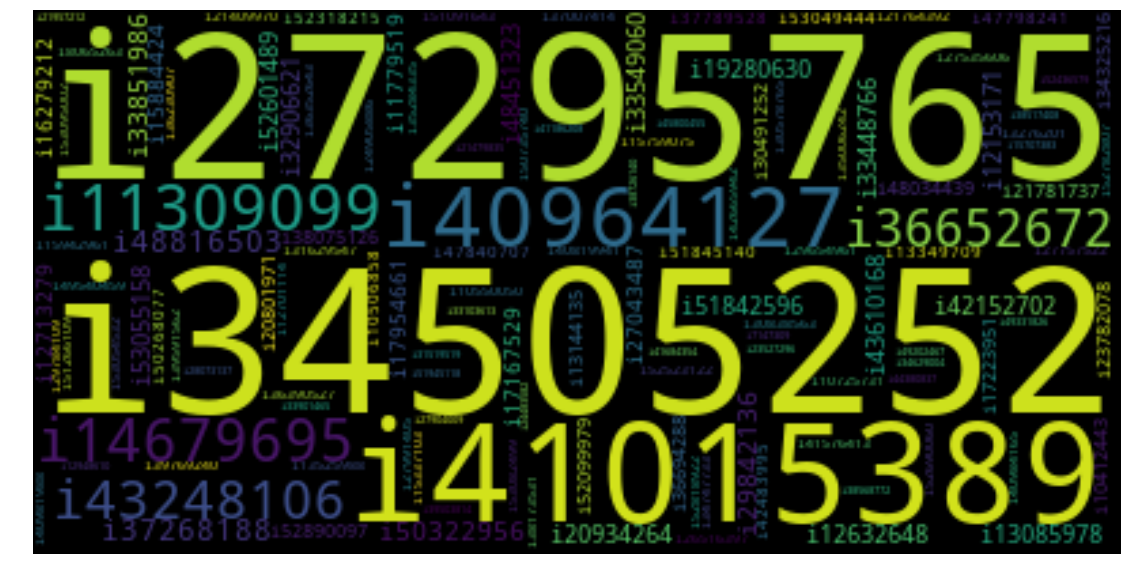

In [220]:
# Most vocal customers on *TurboTax* in the top Digital Software category
slist = [ 'i' + str(id) for id in list(target['customer_id']) ]
strstr=' '.join(slist)
wc = WordCloud().generate(strstr)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

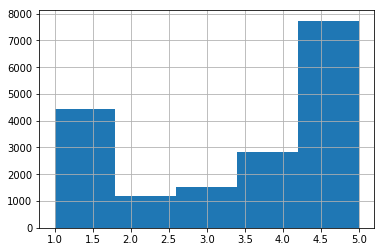

In [221]:
# Rating distribution
#target['star_rating'].hist(figsize=(15,10),bins=24)
target['star_rating'].hist(bins=5)

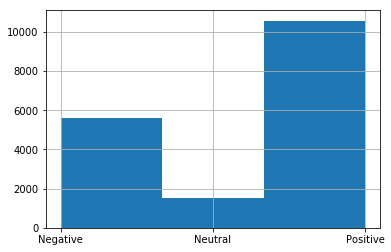

In [222]:
# Sentiment distribution
target['sentiment'].hist(bins=3)

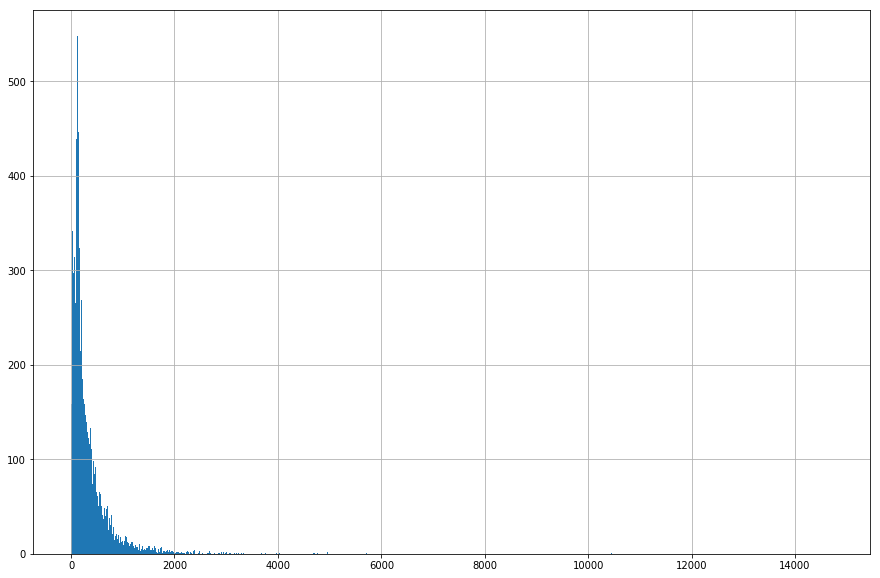

In [223]:
# Review body length distribution
target['length'].hist(figsize=(15,10),bins=2000)

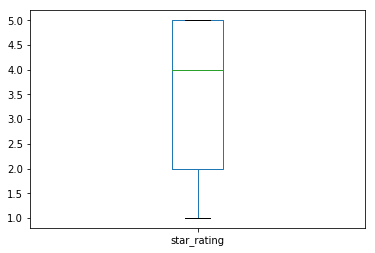

In [224]:
target['star_rating'].plot(kind="box")

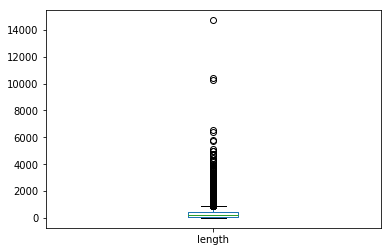

In [225]:
target['length'].plot(kind="box")

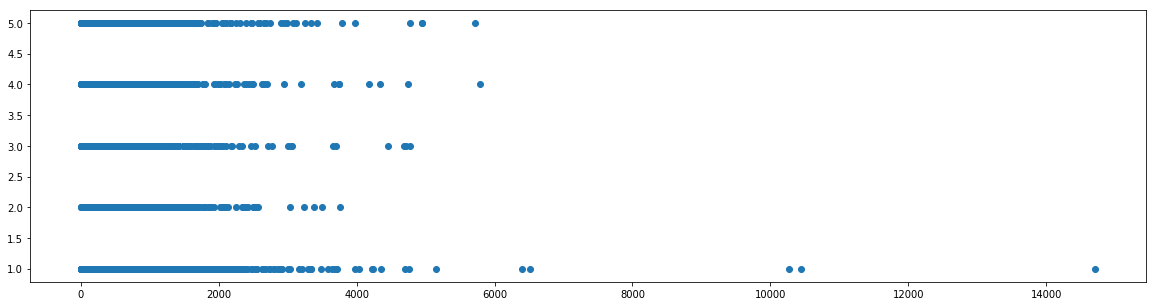

In [226]:
#sp=plt.scatter(target['star_rating'],target['sentiment'])
plt.figure(figsize=(20,5))
sp=plt.scatter(target['length'],target['star_rating'])

In [227]:
#date_sorted_tagged_reviews
# Syntax example: df['day'] = df['datetime'].dt.day
#date_sorted_tagged_reviews['day']=date_sorted_tagged_reviews['review_date'].dt.day

#date_sorted_tagged_reviews['Doy']=date_sorted_tagged_reviews.review_date.dt.dayofyear
#date_sorted_tagged_reviews.plot.scatter(figsize=(20,10),x='Doy', y='star_rating')

In [280]:
#date_sorted_tagged_reviews['year']=date_sorted_tagged_reviews.review_date.dt.year  # Type matters
t=date_sorted_tagged_reviews.groupby('review_date').mean()
t_target = date_sorted_target_reviews.groupby('review_date').mean()

In [281]:
l1=list(t.length)
l2=list(t.index)
l3=list(t.star_rating)
l1_target=list(t_target.length)
l2_target=list(t_target.index)
l3_target=list(t_target.star_rating)

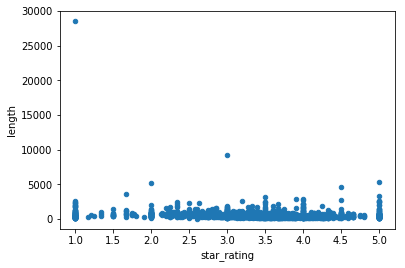

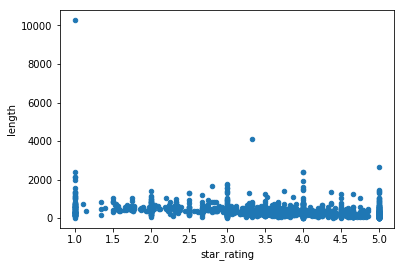

In [282]:
t.plot.scatter(x='star_rating',y='length')
t_target.plot.scatter(x='star_rating',y='length')

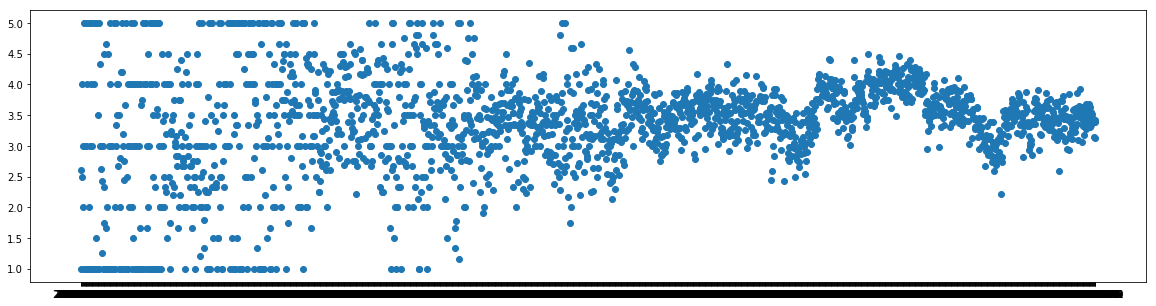

In [284]:
# OVERALL Digital Software
# Average daily rating over the whole duration  
plt.figure(figsize=(20,5))
plt.scatter(l2, l3)

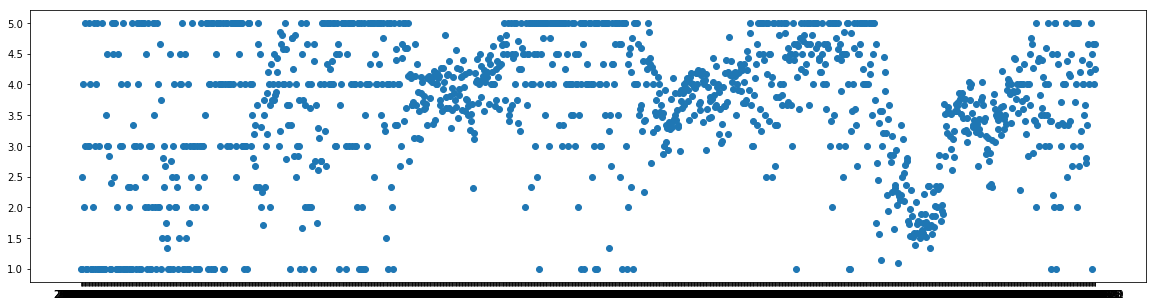

In [285]:
# Specifically for TurboTax
# Average daily rating over the whole duration  
plt.figure(figsize=(20,5))
plt.scatter(l2_target, l3_target)

In [241]:
#def date_to_days(date):
#    try:
#        r = date2num(datetime.datetime.strptime(date, '%Y-%m-%d'))
#        return r
#    except:
#        return None

In [245]:
#t=date_sorted_tagged_reviews.dropna(thresh=2)
#days = [date_to_days(d) for d in t['review_date']]
#ratings = t['star_rating']